#Linear Regression


Linear regression: Perform linear regression on existing data set or synthetic data.
(a) Read or create the data as .csv file. (b) Plot the input-output relation for a single variables also for the multiple variables. (c) Perform linear regression using Normal Equation, Formulation, and Gradient Descent  and compare the results. (with and without using the builtin functions) (d) Find and plot the best fitted line that gives the minimum squared error.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

Generate Synthetic Data

In [ ]:
np.random.seed(15)
#x = np.random.rand(100,1)*10
x = np.arange(1,10,0.1)
noise = np.random.rand(90)*2 #15 is noise level, if inc it will make more scatter
print(len(x))
print("Noise Data: ",noise)


90
Noise Data:  [1.69763539 0.35779185 0.10872643 0.72307689 0.55080186 1.06000045
 0.61183783 0.60894872 0.22348255 0.49979803 1.8352598  0.52829371
 1.43554737 1.73143007 1.61415896 0.42110117 0.33448606 0.09341278
 0.07884462 0.40046162 1.99708681 0.74557396 1.52102055 0.94694889
 1.01943061 1.89007683 0.2188933  0.93018632 0.28311052 1.07669752
 0.59799731 1.07549044 1.33125508 0.7286576  1.24603724 1.28544977
 0.83996364 0.80648487 0.78084065 0.81237904 0.15933221 0.1136624
 0.15666182 1.39135562 0.05831792 0.99898484 0.26526864 0.06151127
 1.27897886 0.8919963  1.94921327 0.65953186 0.39084965 1.36809242
 0.70219771 1.54207223 1.583599   0.88774918 0.5376566  0.04780884
 0.74266513 0.19546176 1.4550451  0.91888885 1.04099295 1.36913809
 0.85058059 1.20694611 1.64769822 0.90374253 1.7758904  0.44079907
 0.2136453  0.02402025 1.8358828  1.27313243 0.43952407 1.09510487
 1.84159934 1.75133188 0.25518431 0.60730748 0.59059314 1.13821008
 1.48683926 0.66003037 1.21570461 1.03135071 1.

In [ ]:
y = 2*x + 3+ noise
print("Y Data: ", y)
print(len(y))

Y Data:  [ 6.69763539  5.55779185  5.50872643  6.32307689  6.35080186  7.06000045
  6.81183783  7.00894872  6.82348255  7.29979803  8.8352598   7.72829371
  8.83554737  9.33143007  9.41415896  8.42110117  8.53448606  8.49341278
  8.67884462  9.20046162 10.99708681  9.94557396 10.92102055 10.54694889
 10.81943061 11.89007683 10.4188933  11.33018632 10.88311052 11.87669752
 11.59799731 12.27549044 12.73125508 12.3286576  13.04603724 13.28544977
 13.03996364 13.20648487 13.38084065 13.61237904 13.15933221 13.3136624
 13.55666182 14.99135562 13.85831792 14.99898484 14.46526864 14.46151127
 15.87897886 15.6919963  16.94921327 15.85953186 15.79084965 16.96809242
 16.50219771 17.54207223 17.783599   17.28774918 17.1376566  16.84780884
 17.74266513 17.39546176 18.8550451  18.51888885 18.84099295 19.36913809
 19.05058059 19.60694611 20.24769822 19.70374253 20.7758904  19.64079907
 19.6136453  19.62402025 21.6358828  21.27313243 20.63952407 21.49510487
 22.44159934 22.55133188 21.25518431 21.807

In [ ]:
data = pd.DataFrame({'X': x, 'y': y})
print(data)

      X          y
0   1.0   6.697635
1   1.1   5.557792
2   1.2   5.508726
3   1.3   6.323077
4   1.4   6.350802
..  ...        ...
85  9.5  22.660030
86  9.6  23.415705
87  9.7  23.431351
88  9.8  24.439601
89  9.9  23.202733

[90 rows x 2 columns]


In [ ]:
# Save the data to a CSV file
data.to_csv("synthetic_univariate_data.csv", index=False)

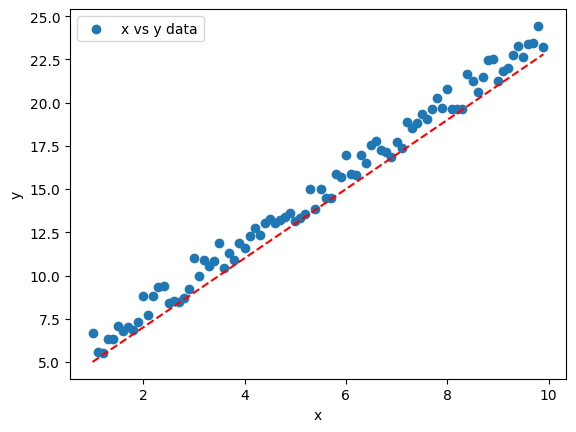

In [ ]:
#Lets plot the data
plt.scatter(x,y,label="x vs y data")
plt.plot(x, 2*x+3, color='red', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# Convert X into a matrix X with an intercept term (adding a column of 1's for bias)
X_matrix = np.vstack([np.ones(len(x)), x]).T  # Adding a column of ones to X for the intercept
print(X_matrix)

[[1.  1. ]
 [1.  1.1]
 [1.  1.2]
 [1.  1.3]
 [1.  1.4]
 [1.  1.5]
 [1.  1.6]
 [1.  1.7]
 [1.  1.8]
 [1.  1.9]
 [1.  2. ]
 [1.  2.1]
 [1.  2.2]
 [1.  2.3]
 [1.  2.4]
 [1.  2.5]
 [1.  2.6]
 [1.  2.7]
 [1.  2.8]
 [1.  2.9]
 [1.  3. ]
 [1.  3.1]
 [1.  3.2]
 [1.  3.3]
 [1.  3.4]
 [1.  3.5]
 [1.  3.6]
 [1.  3.7]
 [1.  3.8]
 [1.  3.9]
 [1.  4. ]
 [1.  4.1]
 [1.  4.2]
 [1.  4.3]
 [1.  4.4]
 [1.  4.5]
 [1.  4.6]
 [1.  4.7]
 [1.  4.8]
 [1.  4.9]
 [1.  5. ]
 [1.  5.1]
 [1.  5.2]
 [1.  5.3]
 [1.  5.4]
 [1.  5.5]
 [1.  5.6]
 [1.  5.7]
 [1.  5.8]
 [1.  5.9]
 [1.  6. ]
 [1.  6.1]
 [1.  6.2]
 [1.  6.3]
 [1.  6.4]
 [1.  6.5]
 [1.  6.6]
 [1.  6.7]
 [1.  6.8]
 [1.  6.9]
 [1.  7. ]
 [1.  7.1]
 [1.  7.2]
 [1.  7.3]
 [1.  7.4]
 [1.  7.5]
 [1.  7.6]
 [1.  7.7]
 [1.  7.8]
 [1.  7.9]
 [1.  8. ]
 [1.  8.1]
 [1.  8.2]
 [1.  8.3]
 [1.  8.4]
 [1.  8.5]
 [1.  8.6]
 [1.  8.7]
 [1.  8.8]
 [1.  8.9]
 [1.  9. ]
 [1.  9.1]
 [1.  9.2]
 [1.  9.3]
 [1.  9.4]
 [1.  9.5]
 [1.  9.6]
 [1.  9.7]
 [1.  9.8]
 [1.  9.9]]


image.png
 using matrix operations.

In [ ]:
# NORMAL EQUATION
# theta using the normal equation: θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot(X_matrix.T).dot(y)
intercept, slope = theta
print(theta)


[3.7462325 2.0268751]


In [ ]:
# Print the coefficients (intercept and slope)
print(f"Intercept (c): {intercept}")
print(f"Slope (m): {slope}")
print("y=mx+c: ",y," = ",slope*x+intercept)
print("My Estimated Intercept was ",2," and Slope was ",3)

Intercept (c): 3.7462325028752996
Slope (m): 2.026875100661746
y=mx+c:  [ 6.69763539  5.55779185  5.50872643  6.32307689  6.35080186  7.06000045
  6.81183783  7.00894872  6.82348255  7.29979803  8.8352598   7.72829371
  8.83554737  9.33143007  9.41415896  8.42110117  8.53448606  8.49341278
  8.67884462  9.20046162 10.99708681  9.94557396 10.92102055 10.54694889
 10.81943061 11.89007683 10.4188933  11.33018632 10.88311052 11.87669752
 11.59799731 12.27549044 12.73125508 12.3286576  13.04603724 13.28544977
 13.03996364 13.20648487 13.38084065 13.61237904 13.15933221 13.3136624
 13.55666182 14.99135562 13.85831792 14.99898484 14.46526864 14.46151127
 15.87897886 15.6919963  16.94921327 15.85953186 15.79084965 16.96809242
 16.50219771 17.54207223 17.783599   17.28774918 17.1376566  16.84780884
 17.74266513 17.39546176 18.8550451  18.51888885 18.84099295 19.36913809
 19.05058059 19.60694611 20.24769822 19.70374253 20.7758904  19.64079907
 19.6136453  19.62402025 21.6358828  21.27313243 20.6

Linear Regression using Gradient Descent 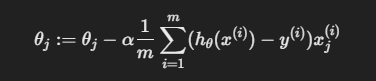

In [ ]:
#gradient descent parameters
theta_gd = np.zeros(2)
alpha =0.01
iteration =1000
m =len(y)

In [ ]:
def cost_f (x,y,theta):
  pred = x.dot(theta)
  cost = (1/(2*m)*np.sum(np.sqaure(pred-y)))
  return cost
def gradient(x,y,theta,alpha,iteration):
  cost_h = np.zeros(iteration)
  pred =x.dot(theta)
  eror = pred -y
  theta = theta - (alpha/m)*x.T.dot(eror)



(c) Perform linear regression using Normal Equation, Formulation, and Gradient Descent  and compare the results. (with and without using the builtin functions)
(d) Find and plot the best fitted line that gives the minimum squared error.

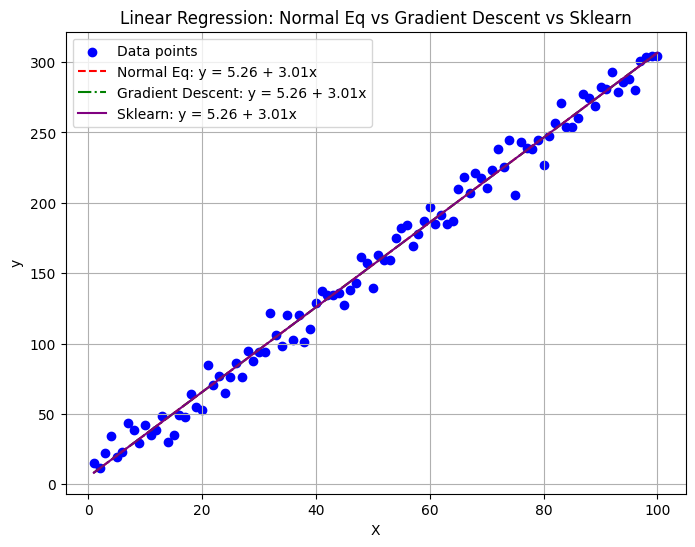

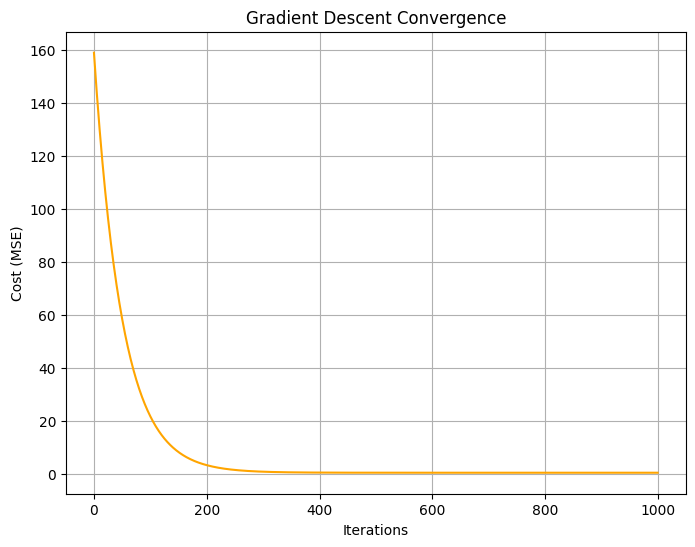

Normal Equation - Intercept: 5.26, Slope: 3.01
Gradient Descent - Intercept: 5.26, Slope: 3.01
Sklearn Linear Regression - Intercept: 5.26, Slope: 3.01


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate a sequence of integer values for the input variable X
X = np.arange(1, 101)  # Generate 100 integer values from 1 to 100

# Define the linear relation: y = 3 * X + 7 with some random noise
noise = np.random.randn(100) * 10  # Random noise
y = 3 * X + 7 + noise  # Linear equation with noise

# Normalize X for Gradient Descent (Feature Scaling)
X_norm = (X - np.mean(X)) / np.std(X)  # Standardization (mean = 0, std = 1)

# Convert X into a matrix with an intercept term (adding a column of 1's for bias)
X_matrix = np.vstack([np.ones(len(X)), X]).T  # Used for Normal Equation
X_matrix_norm = np.vstack([np.ones(len(X_norm)), X_norm]).T  # Used for Gradient Descent

# --- NORMAL EQUATION ---
# Solve for theta using the normal equation: θ = (X^T X)^(-1) X^T y
theta_normal = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot(X_matrix.T).dot(y)

# Extract intercept and slope from the normal equation
intercept_normal, slope_normal = theta_normal

# --- GRADIENT DESCENT ---
# Initialize parameters
theta_gd = np.zeros(2)  # We have two parameters: intercept and slope
alpha = 0.01  # Learning rate (reduced to avoid overflow)
iterations = 1000  # Number of iterations
m = len(y)  # Number of data points

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.mean((predictions - y) ** 2)  # Used mean instead of sum to prevent overflow
    return cost

# Gradient Descent function
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        # Compute the prediction
        predictions = X.dot(theta)
        # Compute the error
        error = predictions - y
        # Update the parameters (theta)
        theta -= (alpha / m) * X.T.dot(error)
        # Save the cost for each iteration
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

# Perform gradient descent to find the best theta values
theta_gd, cost_history = gradient_descent(X_matrix_norm, y, theta_gd, alpha, iterations)

# Convert back to original scale
intercept_gd = theta_gd[0] - theta_gd[1] * np.mean(X) / np.std(X)  # Adjust intercept
slope_gd = theta_gd[1] / np.std(X)  # Adjust slope

# --- BUILT-IN LINEAR REGRESSION (SCIKIT-LEARN) ---
model = LinearRegression()
X_reshaped = X.reshape(-1, 1)  # Reshape X for sklearn
model.fit(X_reshaped, y)
intercept_sklearn, slope_sklearn = model.intercept_, model.coef_[0]

# --- PLOTTING AND COMPARISON ---
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the best-fit line using the normal equation
plt.plot(X, intercept_normal + slope_normal * X, color='red', linestyle='--', label=f"Normal Eq: y = {intercept_normal:.2f} + {slope_normal:.2f}x")

# Plot the best-fit line using gradient descent
plt.plot(X, intercept_gd + slope_gd * X, color='green', linestyle='-.', label=f"Gradient Descent: y = {intercept_gd:.2f} + {slope_gd:.2f}x")

# Plot the best-fit line using sklearn
plt.plot(X, intercept_sklearn + slope_sklearn * X, color='purple', linestyle='-', label=f"Sklearn: y = {intercept_sklearn:.2f} + {slope_sklearn:.2f}x")

# Set titles and labels
plt.title("Linear Regression: Normal Eq vs Gradient Descent vs Sklearn")
plt.xlabel("X")
plt.ylabel("y")

# Show the legend
plt.legend()

# Enable grid
plt.grid(True)

# Show the plot
plt.show()

# --- PLOT COST FUNCTION HISTORY FOR GRADIENT DESCENT ---
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, color='orange')
plt.title("Gradient Descent Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

# Print the results
print(f"Normal Equation - Intercept: {intercept_normal:.2f}, Slope: {slope_normal:.2f}")
print(f"Gradient Descent - Intercept: {intercept_gd:.2f}, Slope: {slope_gd:.2f}")
print(f"Sklearn Linear Regression - Intercept: {intercept_sklearn:.2f}, Slope: {slope_sklearn:.2f}")

# Optionally save the data to a CSV file
data = pd.DataFrame({'X': X, 'y': y})
data.to_csv("synthetic_univariate_data_with_comparison.csv", index=False)
